In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'debug.log',
 'Demand_condition.xlsx',
 'Exploratory Data Analysis (EDA).ipynb',
 'For_Predictive_Model.csv',
 'model.sav',
 'PowerBI_data.csv',
 'Season_Demand_condition.xlsx',
 'Simple Predictive Model.ipynb',
 'train.csv',
 'Transforming data for Power BI .ipynb',
 'Xabit.pbix',
 'Xabit.pdf']

In [3]:
data=pd.read_csv('train.csv')

# Basic information of data

In [4]:
data.shape

(10886, 12)

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [7]:
# Row count = 10886
# Column count = 12

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# ^Information about data type of each attribute

In [10]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [11]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## The abobe description of season and weather makes no sense. But observing the description of holiday or working day is more sensible. We can say that 68% of the obserbation is working day.

In [55]:
data.describe()[['holiday','workingday','temp','atemp','humidity','windspeed','casual','registered','count']]

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [13]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

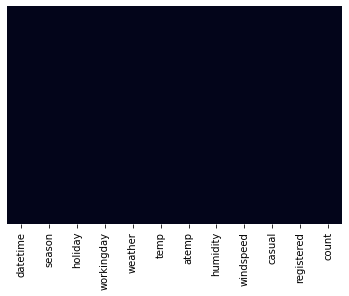

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

### The abobe heatmap says there are no null values.

In [15]:
data[data.isna().any(axis=1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


# The above result is empty. So, There are not any null values.

In [16]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Checking Correlation

In [17]:
cor_matrix=data.corr()

<AxesSubplot:>

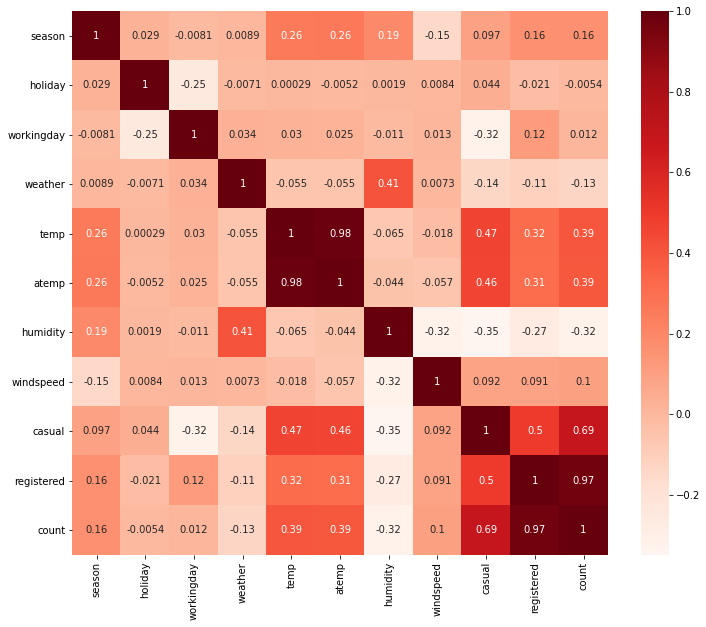

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(cor_matrix,annot=True, cmap=plt.cm.Reds)

# From above correlation matrix 

## We can see dark colors at center. The most highly correlated features are temp and atemp.
## count is positively correlated with season, workingday, temp, atemp, windspeed.
## count is negatively correlated with humidity, holiday and weather

# But remember weather and season are categorical variable which may have different representation values in different datasets.

### Data Fields
#### datetime - hourly date + timestamp  
#### season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
#### holiday - whether the day is considered a holiday
#### workingday - whether the day is neither a weekend nor holiday
#### weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#### 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#### 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#### 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#### temp - temperature in Celsius
#### atemp - "feels like" temperature in Celsius
#### humidity - relative humidity
#### windspeed - wind speed
#### casual - number of non-registered user rentals initiated
#### registered - number of registered user rentals initiated
#### count - number of total rentals 

# Pair plot of numerical variable 

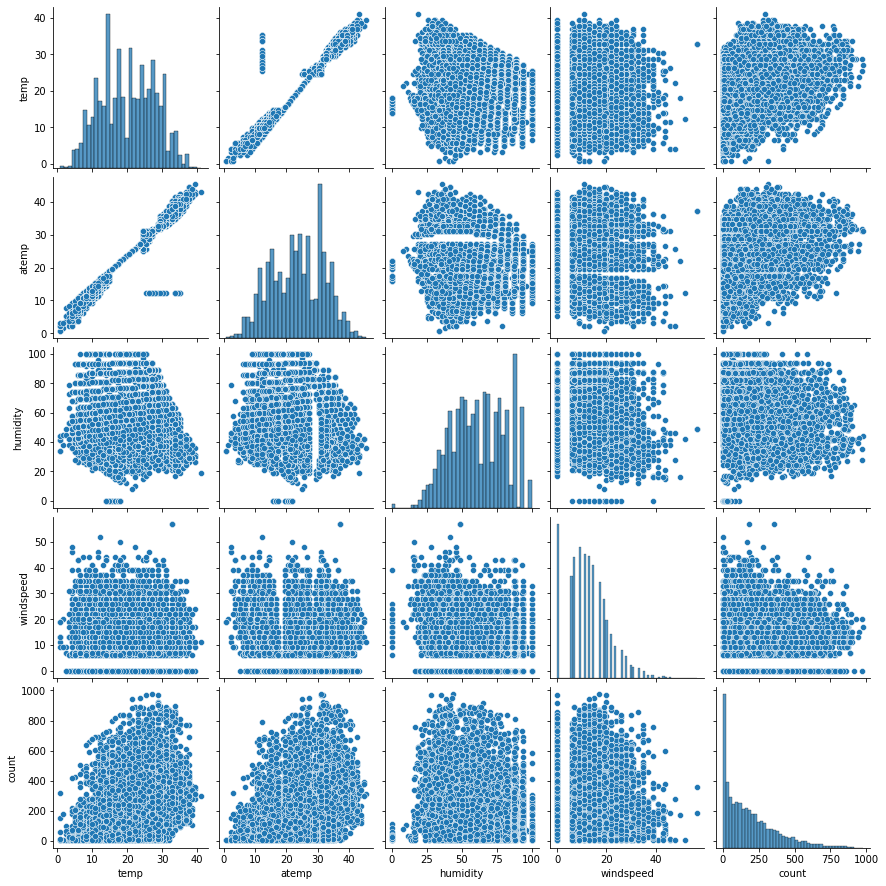

In [19]:
sns.pairplot(data,vars=['temp','atemp','humidity','windspeed','count'])

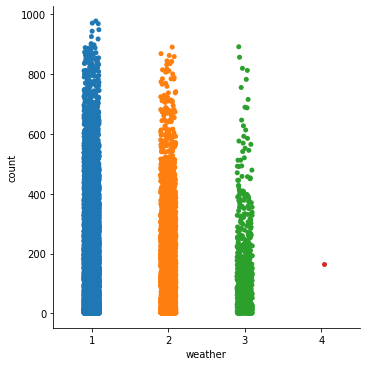

In [20]:
sns.catplot(x='weather',y='count',data=data)

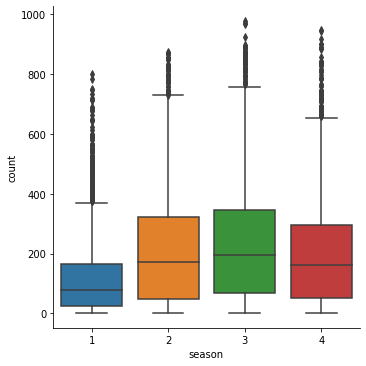

In [21]:
sns.catplot(x='season',y='count',kind='box',data=data)

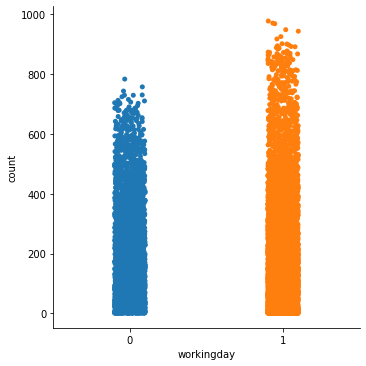

In [22]:
sns.catplot(x='workingday',y='count',data=data)

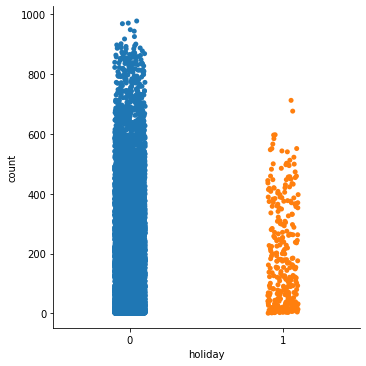

In [23]:
sns.catplot(x='holiday',y='count',data=data)

Text(0, 0.5, 'Frequency')

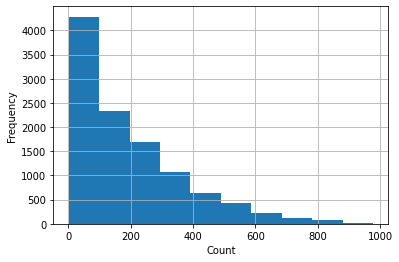

In [24]:
data['count'].hist()
plt.xlabel('Count')
plt.ylabel('Frequency')

In [25]:
data.groupby(['windspeed'])['count'].mean()

windspeed
0.0000     161.101295
6.0032     147.864679
7.0015     169.852031
8.9981     175.645536
11.0014    202.262062
12.9980    202.249520
15.0013    210.833507
16.9979    214.847087
19.0012    218.051775
19.9995    225.235772
22.0028    185.053763
23.9994    220.010949
26.0027    228.744681
27.9993    219.363636
30.0026    217.171171
31.0009    208.955056
32.9975    184.075000
35.0008    230.155172
36.9974    197.045455
39.0007    176.888889
40.9973    189.363636
43.0006    137.916667
43.9989    192.375000
46.0022     67.333333
47.9988    140.500000
50.0021    171.000000
51.9987      5.000000
56.9969    269.500000
Name: count, dtype: float64

<AxesSubplot:xlabel='windspeed', ylabel='count'>

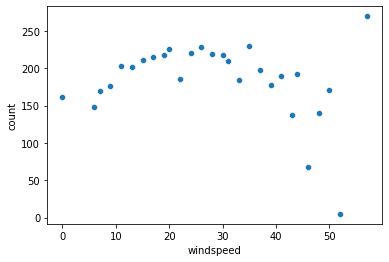

In [26]:
sns.scatterplot(x=data.groupby(['windspeed'])['count'].mean().index,y=data.groupby(['windspeed'])['count'].mean())

# There is more points in middle area. So, People prefer moderate windspeed

In [27]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [28]:
data['weather'].value_counts(normalize=True)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

In [29]:
data['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [30]:
data['holiday'].value_counts(normalize=True)

0    0.971431
1    0.028569
Name: holiday, dtype: float64

In [31]:
data['casual'].sum()

392135

In [32]:
data['registered'].sum()

1693341

In [33]:
data['count'].sum()

2085476

# Converting the 'datetime' column to datetime data-type

In [34]:
data['datetime']=pd.to_datetime(data['datetime'])

In [35]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

#  Adding more features from datetime attribute 

In [36]:
data['year']=data['datetime'].dt.year
data['month']=data['datetime'].dt.month
data['day']=data['datetime'].dt.day
data['hour']=data['datetime'].dt.hour
data['day_week']=data['datetime'].dt.dayofweek

In [37]:
#(Day of week) Monday=0, Sunday=6

In [38]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


# Analyzing  the new features along with casual and registered bike.

<AxesSubplot:xlabel='hour', ylabel='count'>

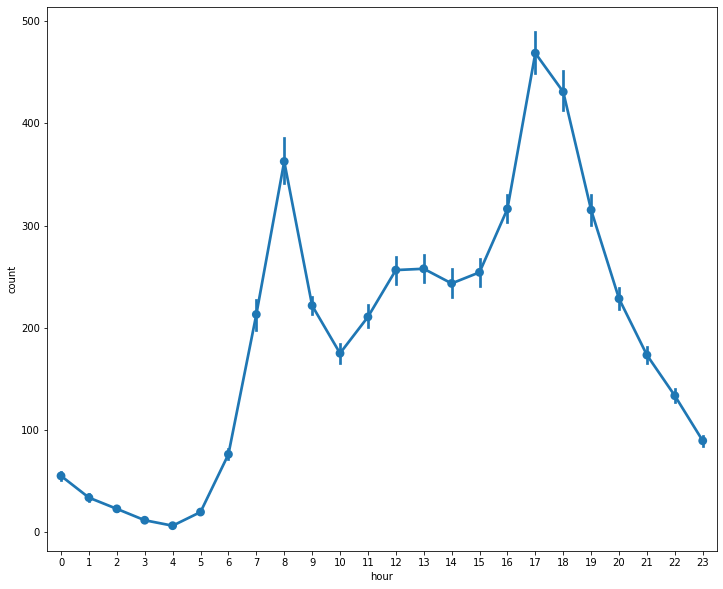

In [39]:
plt.figure(figsize=(12,10))
sns.pointplot(x='hour', y='count', data=data)

# The peak hour is 8 AM in morning and 5-6 PM in evening. Office time may influence in count of bikes.

<AxesSubplot:xlabel='hour', ylabel='casual'>

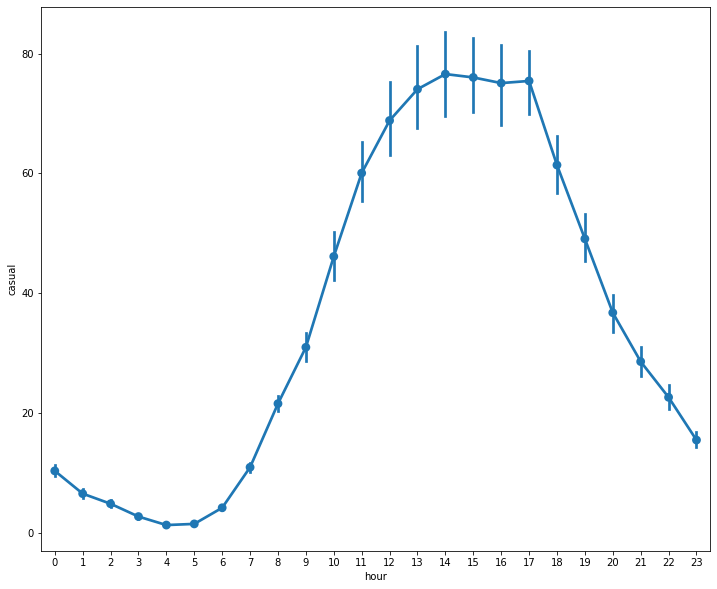

In [40]:
plt.figure(figsize=(12,10))
sns.pointplot(x='hour', y='casual', data=data)

# The peak hour  for casual bike is 1-5 PM

<AxesSubplot:xlabel='hour', ylabel='registered'>

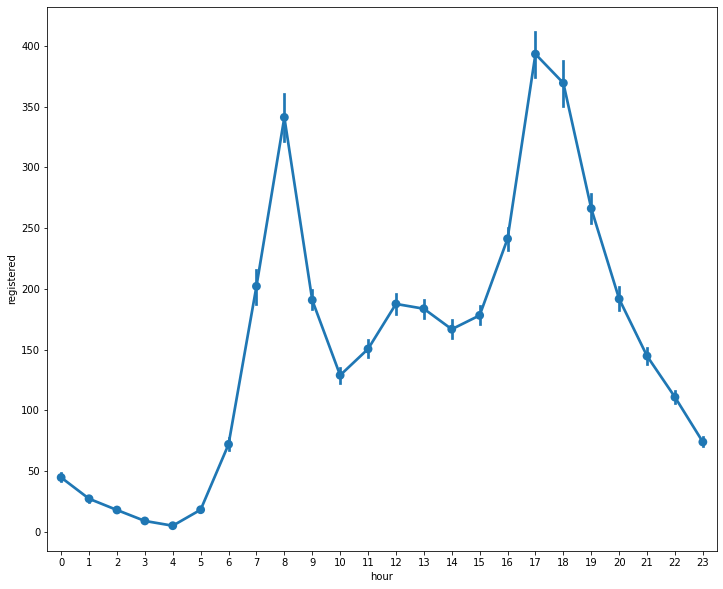

In [41]:
plt.figure(figsize=(12,10))
sns.pointplot(x='hour', y='registered', data=data)

# The peak hour  for registered bikes is 8 AM and 5-6 PM. So, we can say that people prefer registered bike during office time.

<AxesSubplot:xlabel='day_week', ylabel='count'>

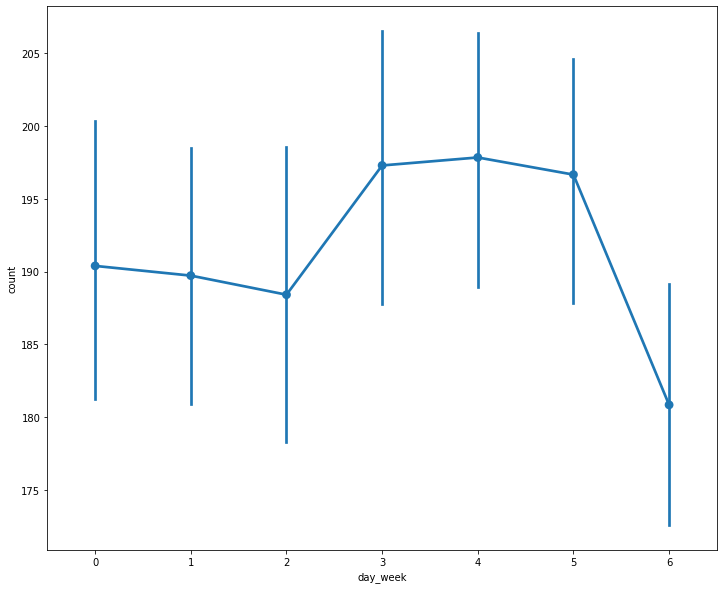

In [42]:
plt.figure(figsize=(12,10))
sns.pointplot(x='day_week', y='count', data=data)

# Most of the bikes are rented onThursday, Friday and Saturday. Least amount of bikes are rented on Sunday.

<AxesSubplot:xlabel='day_week', ylabel='casual'>

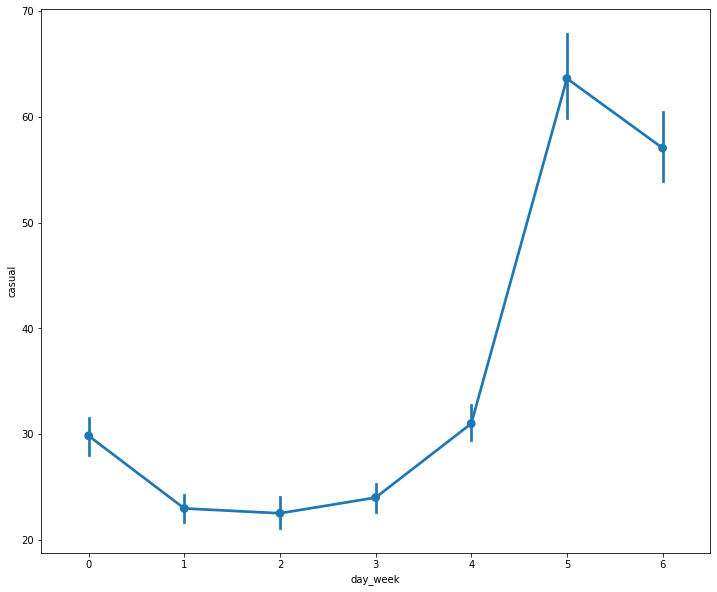

In [43]:
plt.figure(figsize=(12,10))
sns.pointplot(x='day_week', y='casual', data=data)

<AxesSubplot:xlabel='day_week', ylabel='registered'>

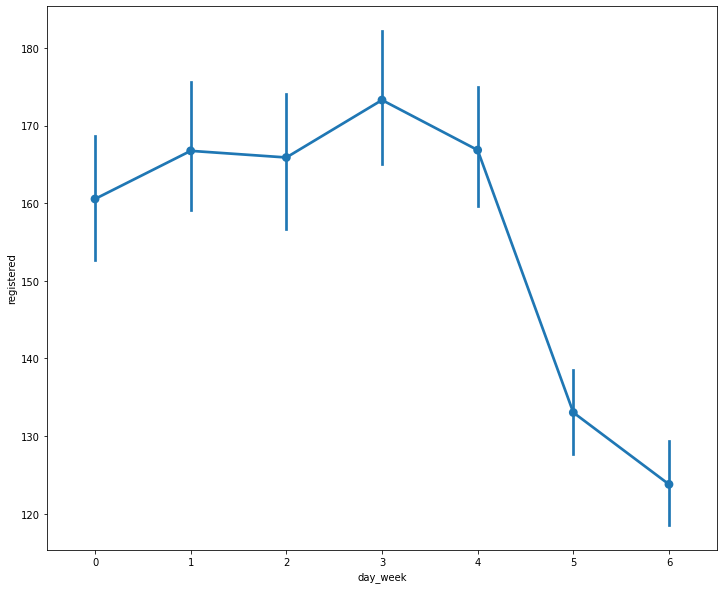

In [44]:
plt.figure(figsize=(12,10))
sns.pointplot(x='day_week', y='registered', data=data)

## From abobe visualization we can say that during the time of weekend people prefer casual bikes, whereas in other days they prefer registered bike. 

# Analyzing the same above things wrt season

<AxesSubplot:title={'center':'Registered count'}, xlabel='hour', ylabel='registered'>

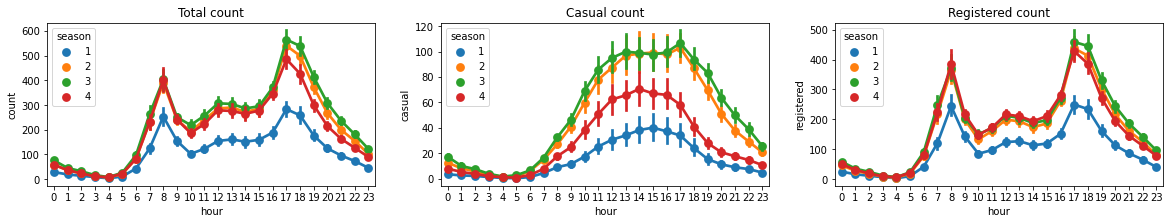

In [45]:
fig, axes = plt.subplots(1, 3,figsize=(20,3))
axes[0].set_title('Total count')
axes[1].set_title('Casual count')
axes[2].set_title('Registered count')

sns.pointplot(ax=axes[0],x='hour', y='count', data=data,hue='season')
sns.pointplot(ax=axes[1],x='hour', y='casual', data=data,hue='season')
sns.pointplot(ax=axes[2],x='hour', y='registered', data=data,hue='season')

# There is almost equal count in registered bikes during Summer, Fall and Winter

<AxesSubplot:title={'center':'Registered count'}, xlabel='day_week', ylabel='registered'>

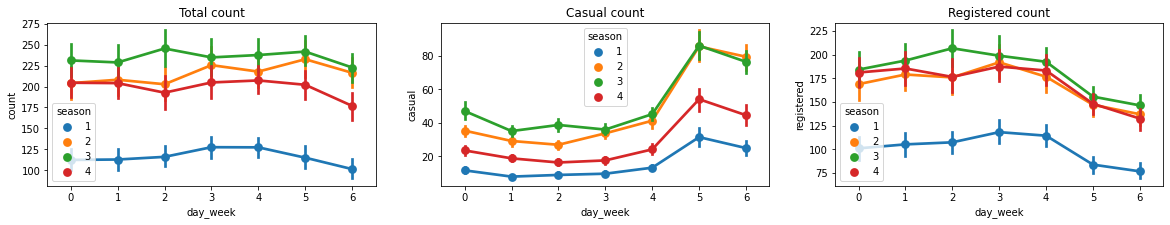

In [46]:
fig, axes = plt.subplots(1, 3,figsize=(20,3))
axes[0].set_title('Total count')
axes[1].set_title('Casual count')
axes[2].set_title('Registered count')

sns.pointplot(ax=axes[0],x='day_week', y='count', data=data,hue='season')
sns.pointplot(ax=axes[1],x='day_week', y='casual', data=data,hue='season')
sns.pointplot(ax=axes[2],x='day_week', y='registered', data=data,hue='season')

# Analyzing wrt weather

<AxesSubplot:title={'center':'Registered count'}, xlabel='hour', ylabel='registered'>

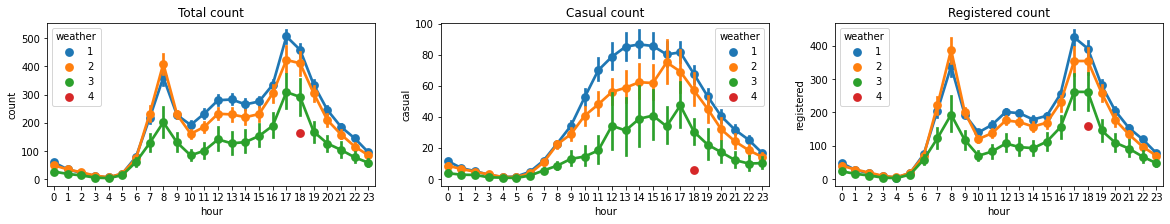

In [47]:
fig, axes = plt.subplots(1, 3,figsize=(20,3))
axes[0].set_title('Total count')
axes[1].set_title('Casual count')
axes[2].set_title('Registered count')

sns.pointplot(ax=axes[0],x='hour', y='count', data=data,hue='weather')
sns.pointplot(ax=axes[1],x='hour', y='casual', data=data,hue='weather')
sns.pointplot(ax=axes[2],x='hour', y='registered', data=data,hue='weather')

# During 12-4 PM if the weather is clear then the number of people using casual bike is more

<AxesSubplot:title={'center':'Registered count'}, xlabel='day_week', ylabel='registered'>

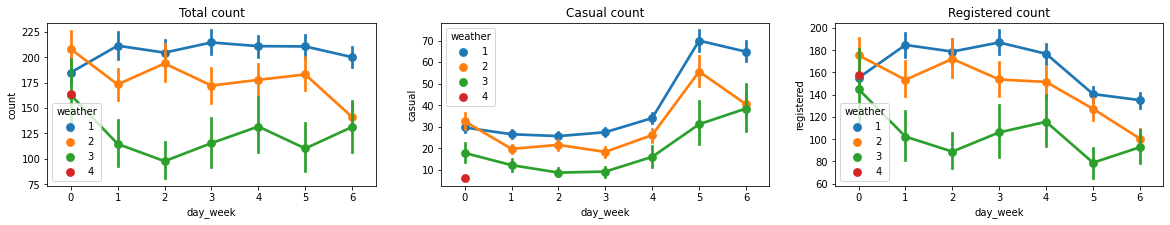

In [48]:
fig, axes = plt.subplots(1, 3,figsize=(20,3))
axes[0].set_title('Total count')
axes[1].set_title('Casual count')
axes[2].set_title('Registered count')

sns.pointplot(ax=axes[0],x='day_week', y='count', data=data,hue='weather')
sns.pointplot(ax=axes[1],x='day_week', y='casual', data=data,hue='weather')
sns.pointplot(ax=axes[2],x='day_week', y='registered', data=data,hue='weather')

# * * * * * * * * * * * * * THANK YOU * * * * * * * * * * * * 

### Saving the data for making predictive model 

In [49]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [50]:
data.to_csv('For_Predictive_Model.csv',index=False)